In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import torch
from model.vae import VAE
from plot.plot import plot_skeleton_3d, plot_loss
from utils.utils import find_device
import os
import numpy as np

from preprocess.preprocess import make_joint_dataset

In [9]:
device = find_device(force_cpu=True)
print("Using device", device)

Using device cpu


In [10]:
data_folder = "/Volumes/Crucial X8/csi_depth_camera/data"
if os.path.exists(data_folder):
    print("path to data does not exist or not accessible atm (hard-drive missing?)")

In [13]:
train_dataset = make_joint_dataset(device=device, data_folder=data_folder)

In [14]:
vae = VAE.train_routine(train_dataset=train_dataset, device=device, 
                        w_loss_reg=0.0, lr=1e-5, batch_size=64, n_epoch=100)

input_dim 220


100%|██████████| 100/100 [00:55<00:00,  1.79it/s, loss=0.05]


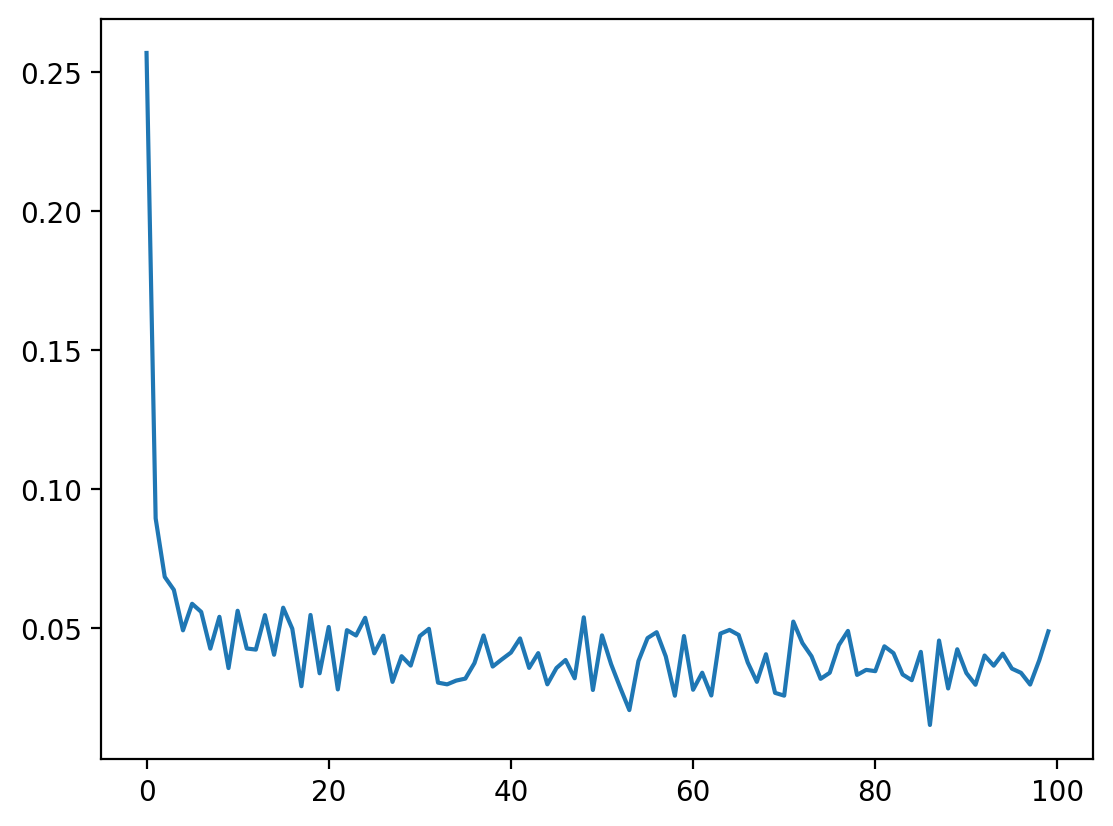

In [15]:
plot_loss(hist_loss=vae.hist_loss)

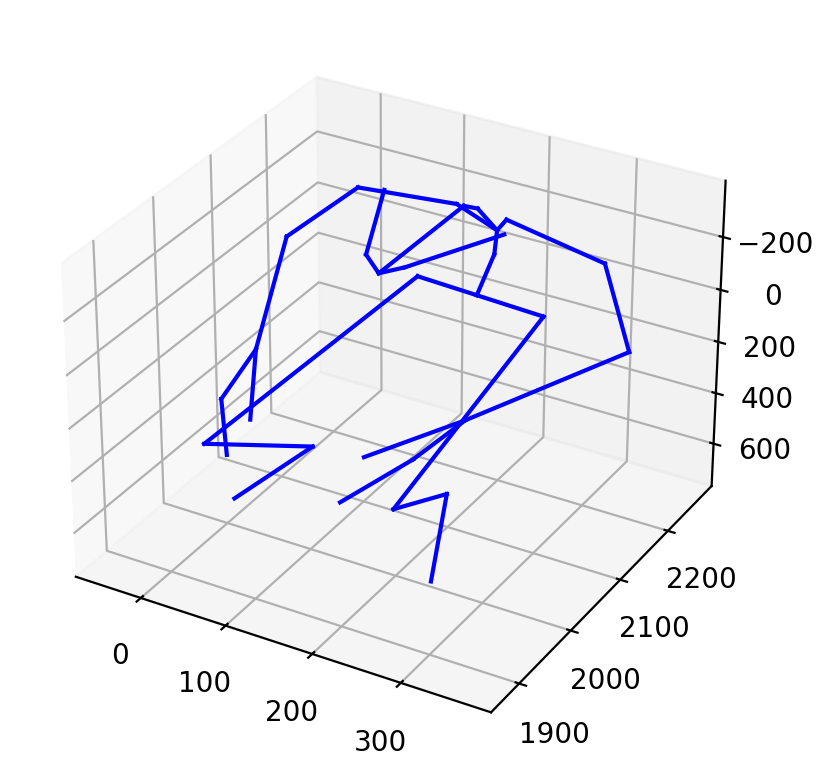

In [70]:
ex_idx = np.random.randint(len(train_dataset.x))
ex = train_dataset.x[ex_idx]

ex_plot = train_dataset.untransform_and_unscale(ex.unsqueeze(0)).squeeze(0)
plot_skeleton_3d(ex_plot, train_dataset.joint_names)

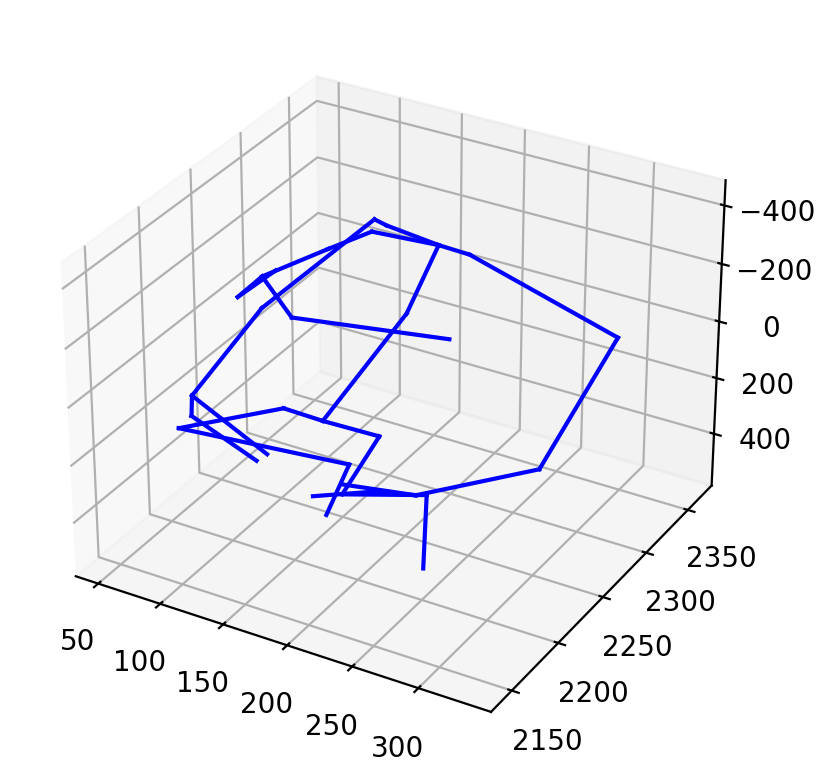

In [77]:
with torch.no_grad():
    smp, mu, std = vae(ex.clone())
    mu_decoded = vae.decode(mu)
ex_prime = train_dataset.untransform_and_unscale(mu_decoded.unsqueeze(0)).squeeze(0)

plot_skeleton_3d(ex_prime, train_dataset.joint_names)

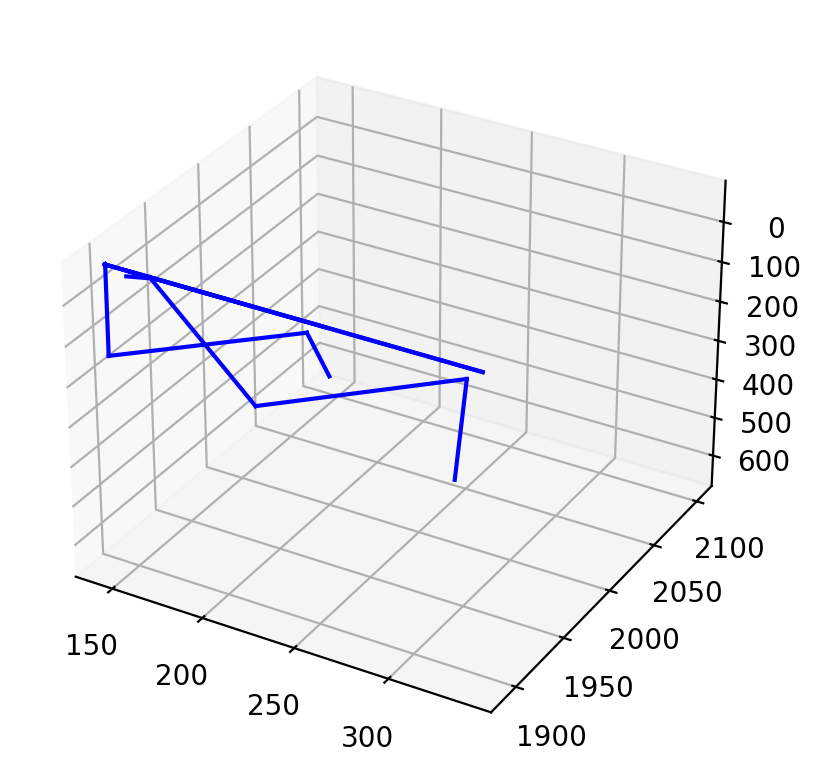

In [65]:
with torch.no_grad():
    smp, mu, std = vae(ex.clone())
    decoded = vae.decode(mu)
    ex_prime = train_dataset.untransform_and_unscale(decoded.unsqueeze(0)).squeeze(0)

plot_skeleton_3d(ex_prime.squeeze(0), train_dataset.joint_names)